# Checkpoint 1

Reminder:

- You are being evaluated for compeletion and effort in this checkpoint.
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/gdrive/MyDrive/data/states_edu.csv')
df.head()

PRIMARY_KEY       STATE  YEAR  ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
0     1992_ALABAMA     ALABAMA  1992     NaN      2678885.0         304177.0   
1      1992_ALASKA      ALASKA  1992     NaN      1049591.0         106780.0   
2     1992_ARIZONA     ARIZONA  1992     NaN      3258079.0         297888.0   
3    1992_ARKANSAS    ARKANSAS  1992     NaN      1711959.0         178571.0   
4  1992_CALIFORNIA  CALIFORNIA  1992     NaN     26260025.0        2072470.0   

   STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  INSTRUCTION_EXPENDITURE  \
0      1659028.0       715680.0          2653798.0                1481703.0   
1       720711.0       222100.0           972488.0                 498362.0   
2      1369815.0      1590376.0          3401580.0                1435908.0   
3       958785.0       574603.0          1743022.0                 964323.0   
4     16546514.0      7641041.0         27138832.0               14358922.0   

   ...  GRADES_4_G  GRADES_8_G  GRADES_12_G  GRADES_1_8_G  GRADES_9_12_G  \
0  ...     57948.0     58025.0      41167.0           NaN            NaN   
1  ...      9748.0      8789.0       6714.0           NaN            NaN   
2  ...     55433.0     49081.0      37410.0           NaN            NaN   
3  ...     34632.0     36011.0      27651.0           NaN            NaN   
4  ...    418418.0    363296.0     270675.0           NaN            NaN   

   GRADES_ALL_G  AVG_MATH_4_SCORE  AVG_MATH_8_SCORE  AVG_READING_4_SCORE  \
0      731634.0             208.0             252.0                207.0   
1      122487.0               NaN               NaN                  NaN   
2      673477.0             215.0             265.0                209.0   
3      441490.0             210.0             256.0                211.0   
4     5254844.0             208.0             261.0                202.0   

   AVG_READING_8_SCORE  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN  

[5 rows x 25 columns]

In [3]:
# let's rename our columns to make them more intuitive
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
#inplace return copy of dataframe

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [4]:
# In that case, we will drop all the rows where the 4th grading reading score is missing
df.dropna(subset=['AVG_READING_4_SCORE'], inplace=True)
df.dropna(subset=['AVG_MATH_4_SCORE'], inplace=True)
df.dropna(subset=['AVG_READING_8_SCORE'], inplace=True)
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)

In [5]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL_ALL_EST', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'ENROLL_PREK', 'ENROLL_KINDER',
       'ENROLL_4', 'ENROLL_8', 'ENROLL_12', 'ENROLL_PRIMARY', 'ENROLL_HS',
       'ENROLL_ALL', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [6]:
df["ENROLL_ALL"].isna().sum()

70

In [7]:
# first let's check if the individual enrollments actually sum up to total enrollment
(df["ENROLL_ALL"]-df["ENROLL_PREK"]-df["ENROLL_KINDER"]-df["ENROLL_PRIMARY"]-df["ENROLL_HS"]).describe()

count       355.000000
mean       4385.185915
std       15885.072561
min           0.000000
25%           0.000000
50%           0.000000
75%         601.000000
max      132533.000000
dtype: float64

In [8]:
((df["ENROLL_ALL"]-df["ENROLL_PREK"]-df["ENROLL_KINDER"]-df["ENROLL_PRIMARY"]-df["ENROLL_HS"])/df["ENROLL_ALL"]*100).describe()

count    355.000000
mean       0.367307
std        1.042794
min        0.000000
25%        0.000000
50%        0.000000
75%        0.115679
max        7.702014
dtype: float64

In [9]:
df['ENROLL_ALL'] = df['ENROLL_ALL'].fillna(df["ENROLL_PREK"]+df["ENROLL_PRIMARY"]+df["ENROLL_HS"])

In [10]:
df["ENROLL_ALL"].isna().sum()

70

In [11]:
df[df["ENROLL_ALL"].isna()][['ENROLL_PREK','ENROLL_PRIMARY','ENROLL_HS','ENROLL_ALL_EST']].notna().any()

ENROLL_PREK       False
ENROLL_PRIMARY    False
ENROLL_HS         False
ENROLL_ALL_EST    False
dtype: bool

In [12]:
df[df.ENROLL_ALL_EST.isna()]["ENROLL_ALL"].notna().sum()

51

In [13]:
((df["ENROLL_ALL"] - df["ENROLL_ALL_EST"])/df["ENROLL_ALL"]).describe()

count    357.000000
mean       0.027969
std        0.053286
min       -0.096404
25%        0.004540
50%        0.014245
75%        0.033770
max        0.450693
dtype: float64

In [14]:
df["ENROLL_ALL_EST"] = df["ENROLL_ALL_EST"].fillna(df["ENROLL_ALL"])

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *AVG_READING_4_SCORE*



How many years of data are logged in our dataset?

1992 to 2019 ~ 27 years

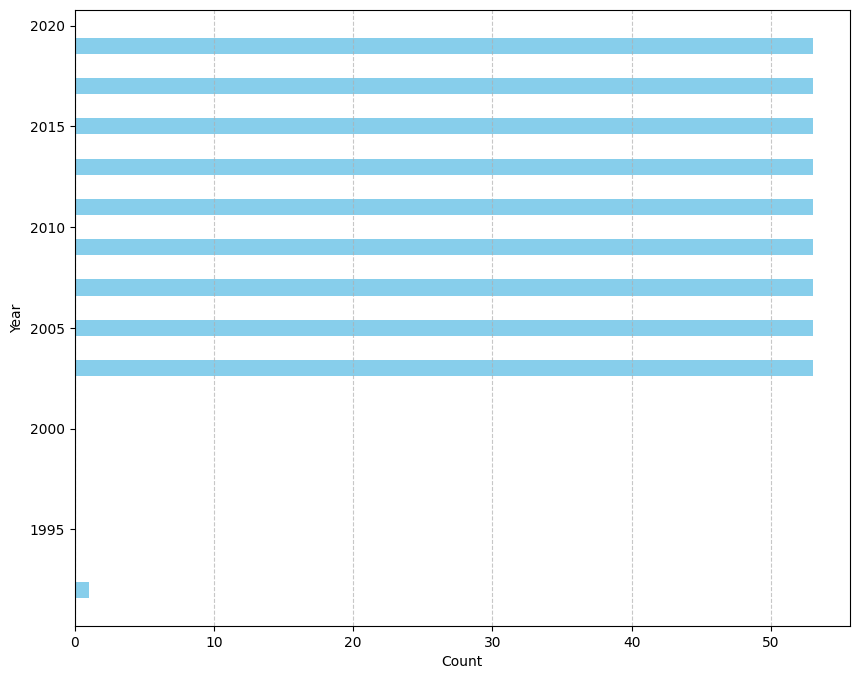

In [15]:
import matplotlib.pyplot as plt

year_counts = df['YEAR'].value_counts().sort_index()

plt.figure(figsize=(10, 8))
plt.barh(year_counts.index, year_counts.values, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Year')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

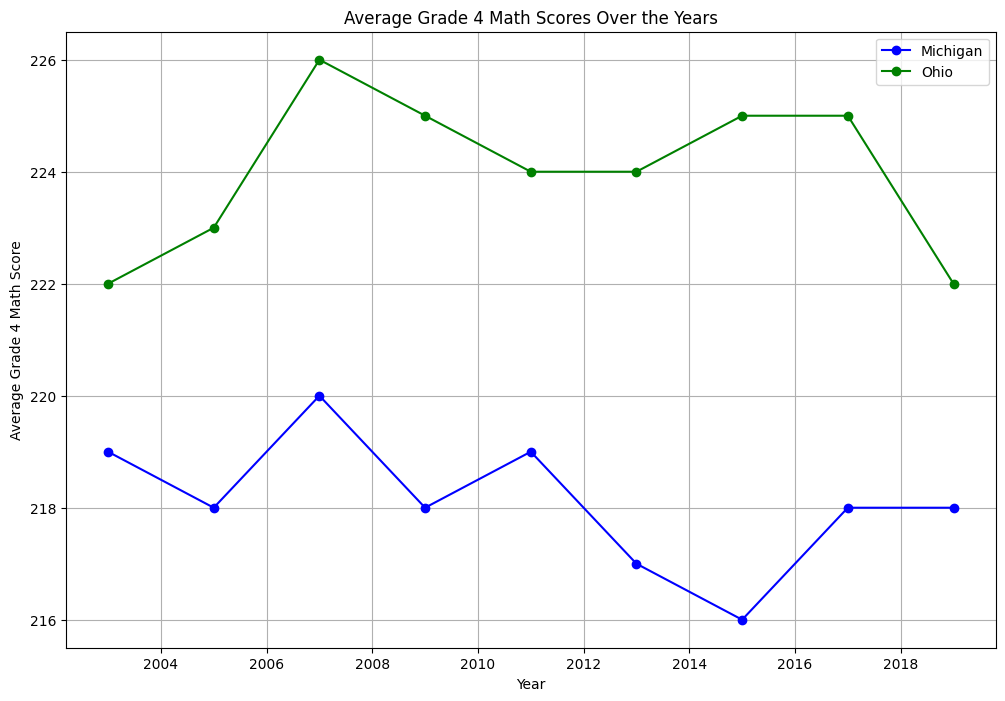

In [16]:
import matplotlib.pyplot as plt

michigan_data = df[df['STATE'] == 'MICHIGAN']
ohio_data = df[df['STATE'] == 'OHIO']

michigan_avg_scores = michigan_data.groupby('YEAR')['AVG_READING_4_SCORE'].mean()
ohio_avg_scores = ohio_data.groupby('YEAR')['AVG_READING_4_SCORE'].mean()

plt.figure(figsize=(12, 8))
plt.plot(michigan_avg_scores.index, michigan_avg_scores.values, label='Michigan', marker='o', color = 'blue')
plt.plot(ohio_avg_scores.index, ohio_avg_scores.values, label='Ohio', marker='o', color = 'green')

plt.xlabel('Year')
plt.ylabel('Average Grade 4 Math Score')
plt.title('Average Grade 4 Math Scores Over the Years')
plt.legend()
plt.grid(True)

plt.show()



Find the average for your outcome score across all states in 2019

In [17]:
data_2019 = df[df['YEAR'] == 2019]
average_score_2019 = data_2019['AVG_READING_4_SCORE'].mean()

average_score_2019

219.79245283018867

Find the maximum outcome score for every state.

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [18]:
max_scores_by_state = df.groupby('STATE')['AVG_READING_4_SCORE'].max()

print(max_scores_by_state)


STATE
ALABAMA                 220.0
ALASKA                  214.0
ARIZONA                 216.0
ARKANSAS                219.0
CALIFORNIA              216.0
COLORADO                227.0
CONNECTICUT             230.0
DELAWARE                226.0
DISTRICT_OF_COLUMBIA    214.0
DODEA                   235.0
FLORIDA                 228.0
GEORGIA                 222.0
HAWAII                  218.0
IDAHO                   223.0
ILLINOIS                222.0
INDIANA                 227.0
IOWA                    225.0
KANSAS                  225.0
KENTUCKY                228.0
LOUISIANA               216.0
MAINE                   226.0
MARYLAND                232.0
MASSACHUSETTS           237.0
MICHIGAN                220.0
MINNESOTA               227.0
MISSISSIPPI             219.0
MISSOURI                224.0
MONTANA                 227.0
NATIONAL                223.0
NEBRASKA                227.0
NEVADA                  218.0
NEW_HAMPSHIRE           232.0
NEW_JERSEY              233.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable.

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [19]:
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_ALL']

Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

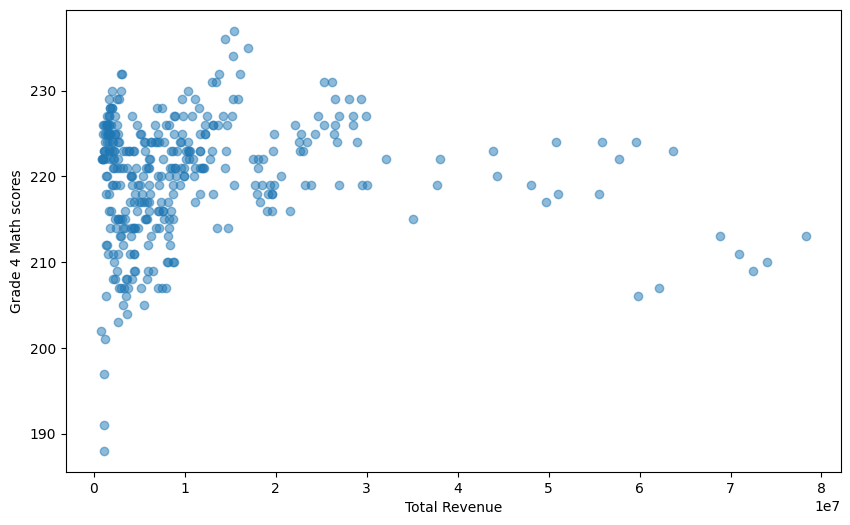

In [20]:
# Scatter plot of Total Revenue vs. Grade 4 Math scores
plt.figure(figsize=(10, 6))
plt.scatter(df['TOTAL_REVENUE'], df['AVG_READING_4_SCORE'], alpha=0.5)
plt.xlabel('Total Revenue')
plt.ylabel('Grade 4 Math scores')
plt.show()

[link text](https://)**<Total Revenue vs. Grade 4 scores>**

**Visualization 2**

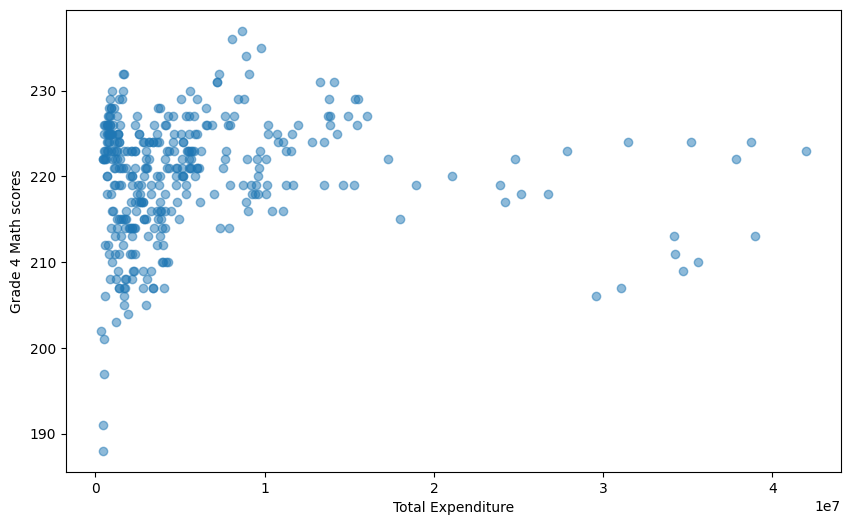

In [21]:
# Scatter plot of Total Expenditure vs. Grade 4 Math scores
plt.figure(figsize=(10, 6))
plt.scatter(df['INSTRUCTION_EXPENDITURE'], df['AVG_READING_4_SCORE'], alpha=0.5)
plt.xlabel('Total Expenditure')
plt.ylabel('Grade 4 Math scores')
plt.show()


**<Total Expenditure vs. Grade 4 scores>**

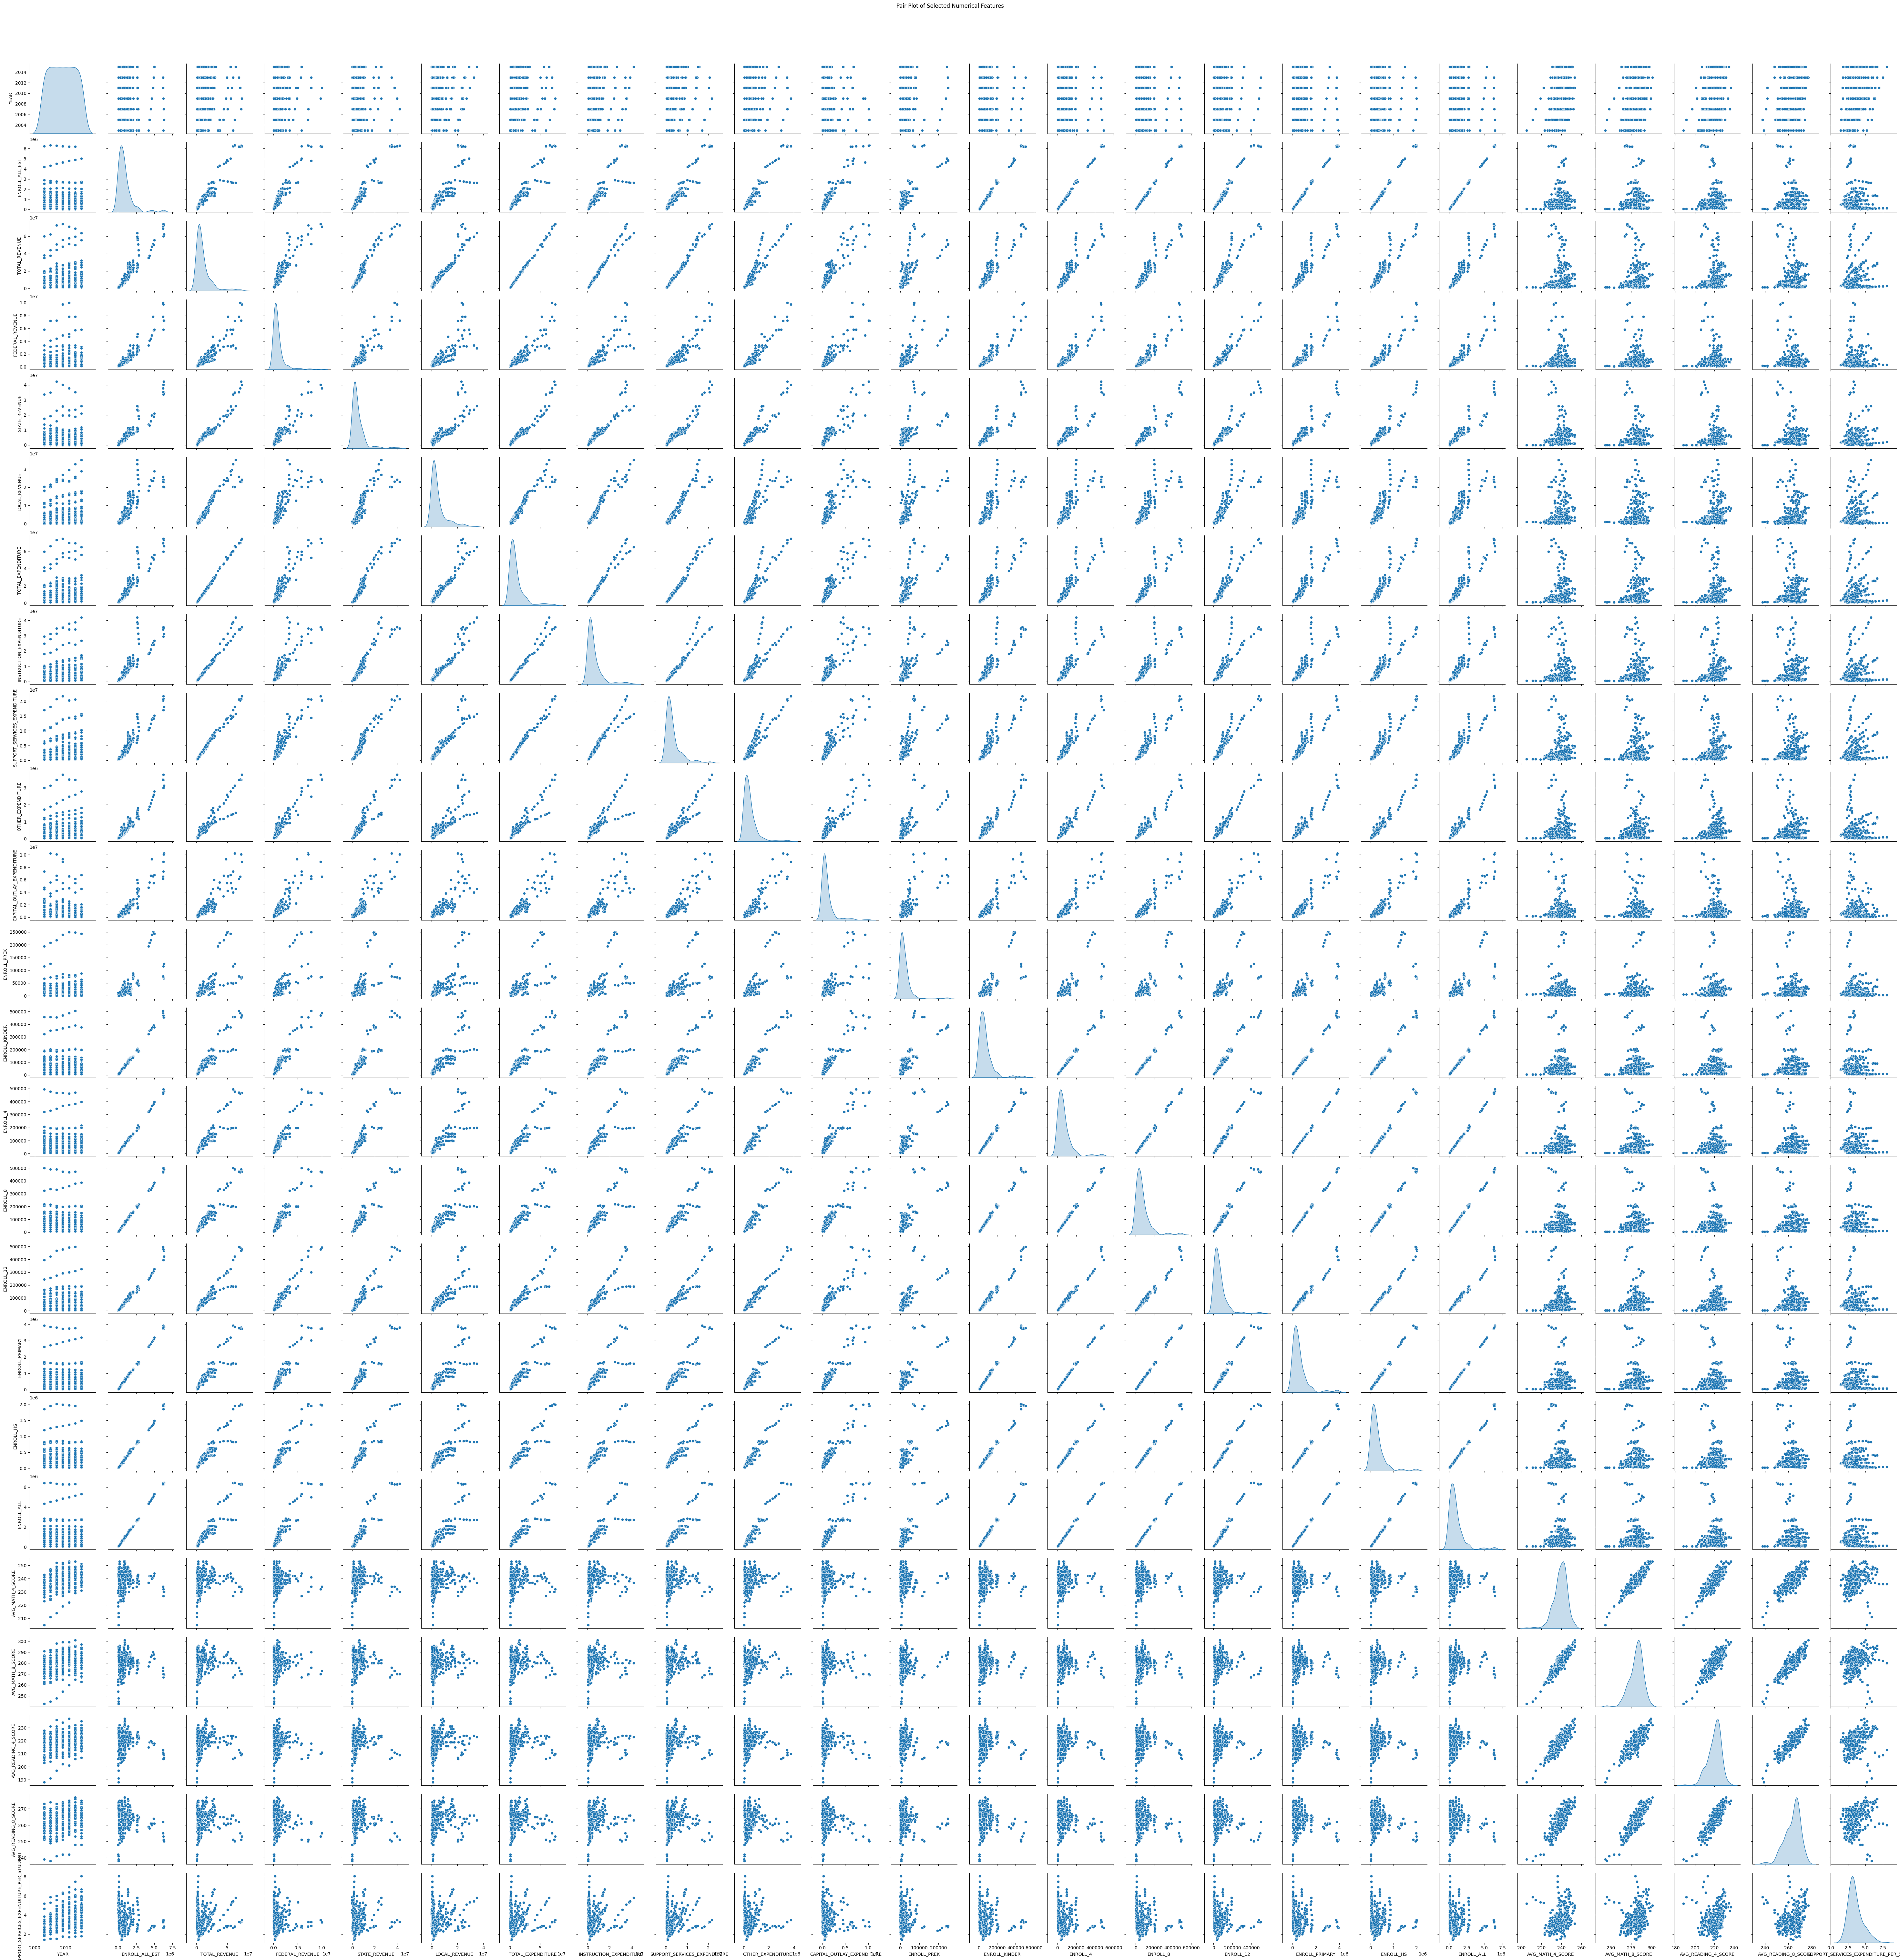

In [22]:
import seaborn as sns

numerical_features = df.select_dtypes(include=['number']).columns

pairplot_data = df[numerical_features].dropna()
sns.pairplot(pairplot_data, diag_kind='kde')
plt.suptitle('Pair Plot of Selected Numerical Features', y=1.02)
plt.show()

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = df[['AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_8_SCORE']]
y = df['AVG_READING_4_SCORE']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
# create your model here
model = LinearRegression()

In [28]:
model.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [30]:
print(model.intercept_)

-48.86779396607113


In [31]:
print(model.coef_)

[ 0.71228908 -0.40582119  0.80719475]


In [32]:
model.score(X_test, y_test)

0.882533970461261

In [33]:
# mean error
np.mean(model.predict(X_test)-y_test)

0.3553477986689819

In [34]:
# mean absolute error
np.mean(np.abs(model.predict(X_test)-y_test))

1.8102812292847155

In [35]:
# root mean squared error -- penalizes large errors
np.mean((model.predict(X_test)-y_test)**2)**0.5

2.291689484894998

We have copied over the graphs that visualize the model's performance on the training and testing set.

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

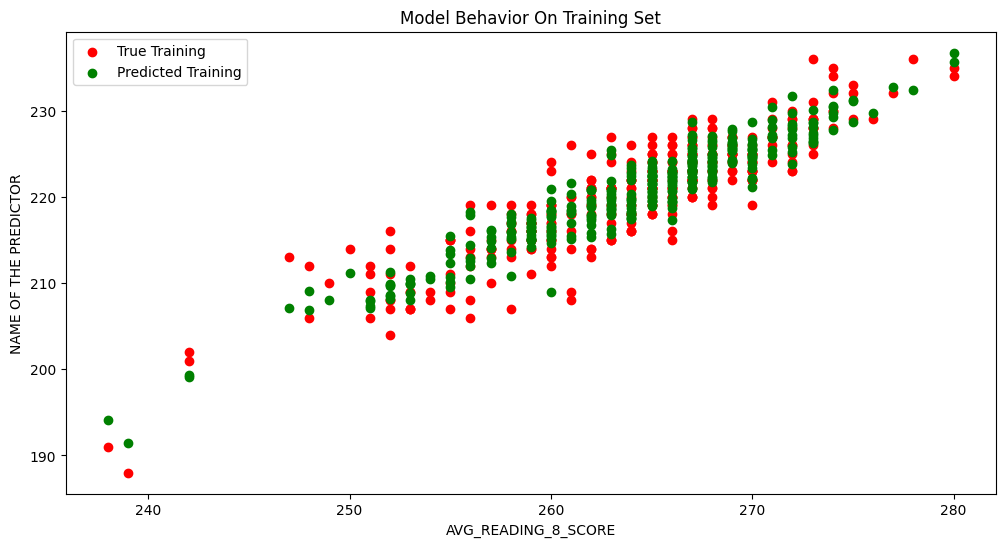

In [36]:
col_name = 'AVG_READING_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

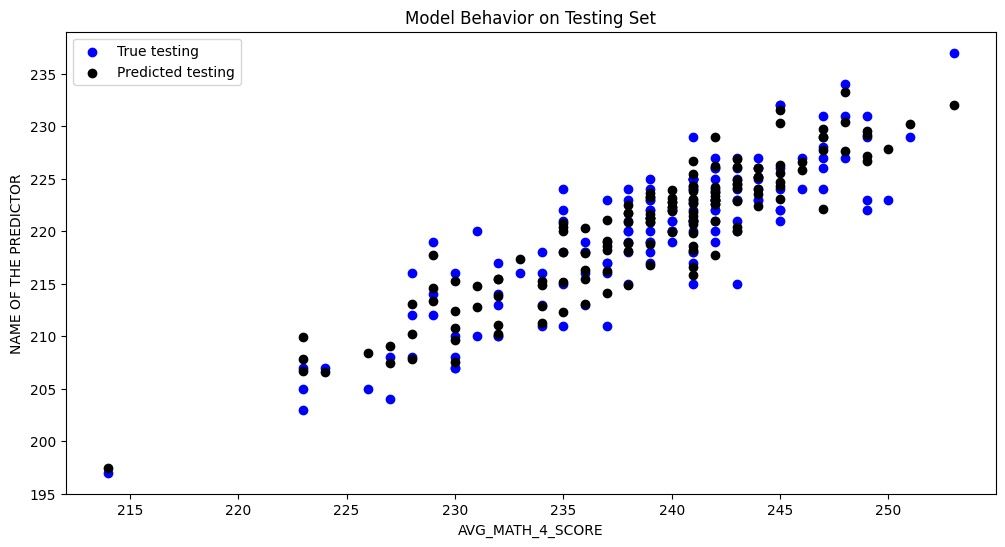

In [37]:
col_name = "AVG_MATH_4_SCORE"

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\>**


For this analysis, I focused on predicting Grade 4 average reading scores using the provided dataset, states_edu.csv. After initial exploration, I identified relevant features for the prediction, including variables such as 'AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_8_SCORE'. Through visualizations, I observed a positive correlation between AVG_MATH_4_SCORE and Grade 4 Math scores, suggesting that increased math score lead to improved performance. For the modeling phase, I split the data into training and testing sets into 70:30 ratio and employed a linear regression model from the sklearn library. The model demonstrated satisfactory performance with a low Mean Squared Error (MSE) and a score of 0.88 on the test set, indicating its ability to accurately predict Grade 4 average scores. In summary, this analysis suggests that student performance in Grade 4 Math can be predicted to some extent based on factors like 'AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_8_SCORE'.